# Lab 9 - Augmentations

For this lab, we are trying out different methods of Data Augmentation and Dimensionality Reduction. The main tasks will involve revisiting your previous labs and created models, applying the methods mentioned in the lecture, and investigating their impact on performance.
Steps:

1. Try to visualize/plot each of the augmentations you apply – for instance, your modified dataframe or augmented images (rotated, flipped, etc.).

2. Plot your training and test performance after each method (e.g., with accuracy/loss curves). How does it change? Why?

Examples for methods to try:
- Augmentations:

    - Apply various image data augmentation techniques to your CIFAR CNN classification model (Lab 8).

    - Add very small random noise (e.g. gaussian noise) to your acquired sensor datasets – what are you changing? Why? Does it affect your task, and how?

    - Change some small details (e.g., randomly modify ages or ticket prices) in your Titanic dataset – does it impact classification performance?


- Scaling:

    - Apply different scaling methods on your sensor data (e.g. remove some less relevent sensors?) – how does it impact model performance?

- Dimensionality Reduction:

    - Perform PCA on your aquired datasets to reduce dimensions while preserving key patterns.
    
- Apply PCA on the Titanic dataset to identify the most relevant features.

Resources:
- images augmentations:

    https://learnopencv.com/image-filtering-using-convolution-in-opencv/

    https://scikit-image.org/docs/stable/auto_examples/index.html

    https://www.tensorflow.org/tutorials/images/data_augmentation

    https://www.datacamp.com/tutorial/complete-guide-data-augmentation

- signals augmentations:
    
    https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html


In [1]:
!pip install scikit-image
!pip install numpy
!pip install matplotlib
!pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform, util
from tensorflow.keras.datasets import cifar10

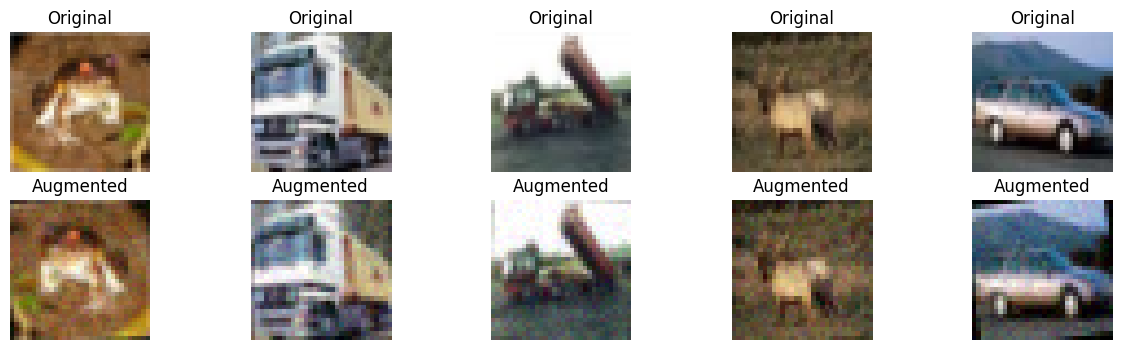

In [6]:
# this example creates an augment_image function that applies 3 augmentations: random flip, rotation, and noise to the image. feel free to take inspiration, or change some of these to preprocess your own datasets!

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# augmentation functions
def random_rotate(image):
    angle = np.random.uniform(-10, 10)  # rotate between -10 to 10 degrees
    return transform.rotate(image, angle)

def random_flip(image):
    if np.random.rand() > 0.5:
        return np.fliplr(image)  # flip horizontally
    return image

def random_noise(image):
    return util.random_noise(image, mode='gaussian', var=0.001)  # add Gaussian noise

def augment_image(image):
    """Apply multiple augmentations randomly."""
    image = random_rotate(image)
    image = random_flip(image)
    image = random_noise(image)
    return image

num_samples = 5 # for visualisation
augmented_images = np.array([augment_image(img) for img in x_train[:num_samples]]) # this is applying thr transformations to your training data - remove the "[:num_samples]]" to apply it to the full training set

# plot original vs. augmented images
fig, axes = plt.subplots(2, num_samples, figsize=(15, 4))

for i in range(num_samples):
    axes[0, i].imshow(x_train[i].astype("uint8"))
    axes[0, i].axis("off")
    axes[0, i].set_title("Original")

    axes[1, i].imshow(augmented_images[i])
    axes[1, i].axis("off")
    axes[1, i].set_title("Augmented")

plt.show()
